In [4]:
import pandas as pd
houses = pd.read_csv("house_train.csv")
print(houses.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

houses = pd.read_csv("house_train.csv")
print("First 5 rows:")
print(houses.head())
print("\nBasic stats:")
print(houses.describe())
print("\nMissing values:")
print(houses.isnull().sum().sort_values(ascending=False).head(10))

First 5 rows:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   200

In [8]:
# Drop columns with tons of missing data (we’ll skip these for simplicity)
houses = houses.drop(columns=["PoolQC", "MiscFeature", "Alley", "Fence"])

# Fill missing LotFrontage with median
houses["LotFrontage"] = houses["LotFrontage"].fillna(houses["LotFrontage"].median())
print("Missing values after cleaning:")
print(houses[["LotFrontage", "SalePrice", "BedroomAbvGr", "OverallQual"]].isnull().sum())

Missing values after cleaning:
LotFrontage     0
SalePrice       0
BedroomAbvGr    0
OverallQual     0
dtype: int64


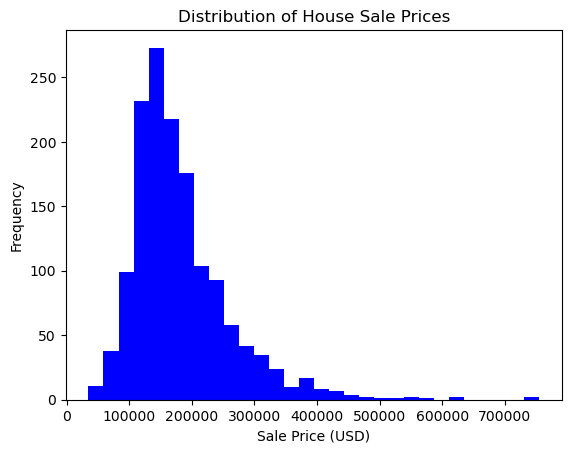

Median SalePrice: 163000.0


In [10]:
plt.hist(houses["SalePrice"], bins=30, color="blue")
plt.title("Distribution of House Sale Prices")
plt.xlabel("Sale Price (USD)")
plt.ylabel("Frequency")
plt.show()
print("Median SalePrice:", houses["SalePrice"].median())

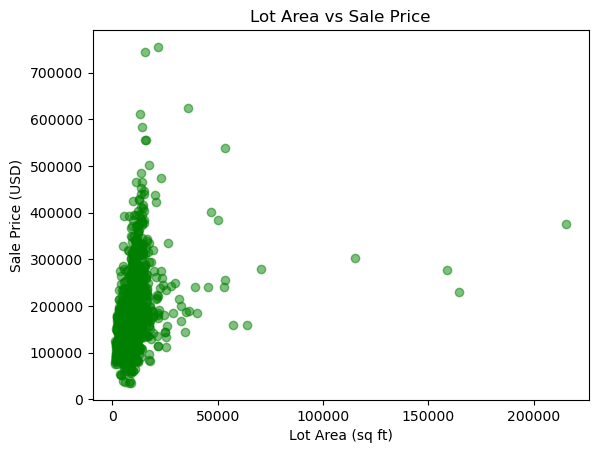

Correlation: 0.26384335387140573


In [12]:
plt.scatter(houses["LotArea"], houses["SalePrice"], alpha=0.5, color="green")
plt.title("Lot Area vs Sale Price")
plt.xlabel("Lot Area (sq ft)")
plt.ylabel("Sale Price (USD)")
plt.show()
print("Correlation:", houses["LotArea"].corr(houses["SalePrice"]))

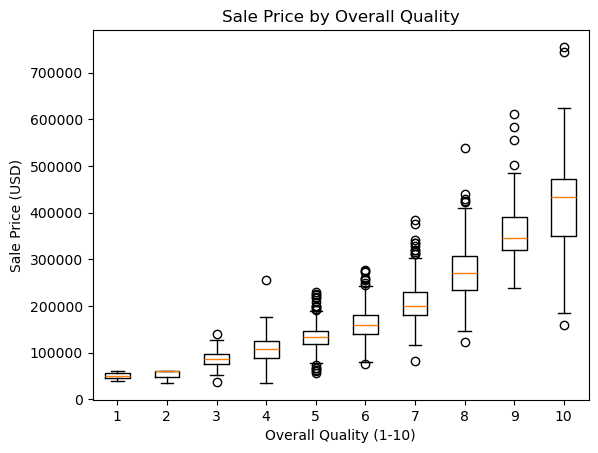

Median price by quality:
OverallQual
1      50150.0
2      60000.0
3      86250.0
4     108000.0
5     133000.0
6     160000.0
7     200141.0
8     269750.0
9     345000.0
10    432390.0
Name: SalePrice, dtype: float64


In [14]:
plt.boxplot([houses[houses["OverallQual"] == i]["SalePrice"] for i in range(1, 11)],
            labels=[str(i) for i in range(1, 11)])
plt.title("Sale Price by Overall Quality")
plt.xlabel("Overall Quality (1-10)")
plt.ylabel("Sale Price (USD)")
plt.show()
print("Median price by quality:")
print(houses.groupby("OverallQual")["SalePrice"].median())

Slope (price per quality point): 45435.8025930994
Intercept: -96206.07951476038


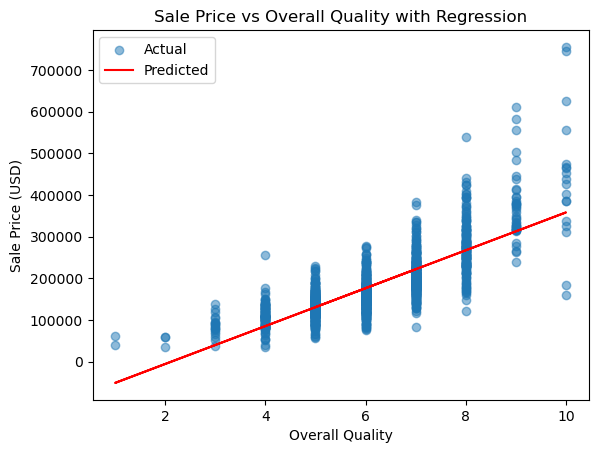

In [16]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prep data (drop any rows with NaN in these columns)
data = houses[["OverallQual", "SalePrice"]].dropna()
X = data[["OverallQual"]]  # Feature
y = data["SalePrice"]      # Target

# Fit model
model = LinearRegression()
model.fit(X, y)
print("Slope (price per quality point):", model.coef_[0])
print("Intercept:", model.intercept_)

# Predict and plot
predictions = model.predict(X)
plt.scatter(X, y, alpha=0.5, label="Actual")
plt.plot(X, predictions, color="red", label="Predicted")
plt.title("Sale Price vs Overall Quality with Regression")
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price (USD)")
plt.legend()
plt.show()

In [18]:
print(f"Median SalePrice: ${houses['SalePrice'].median():,.0f}")
print(f"Quality impact: ~${model.coef_[0]:,.0f} per point")
print("Key insight: Overall quality strongly drives price, lot size less so.")

Median SalePrice: $163,000
Quality impact: ~$45,436 per point
Key insight: Overall quality strongly drives price, lot size less so.
